In [37]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
! python -m pip install pandas-datareader
import pandas_datareader as web

In [39]:
# get the stick quote
df = web.DataReader('AAPL',data_source = 'yahoo',start = '2012-01-01', end = '2022-02-28')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643504
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917513
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [40]:
df.shape

(2556, 6)

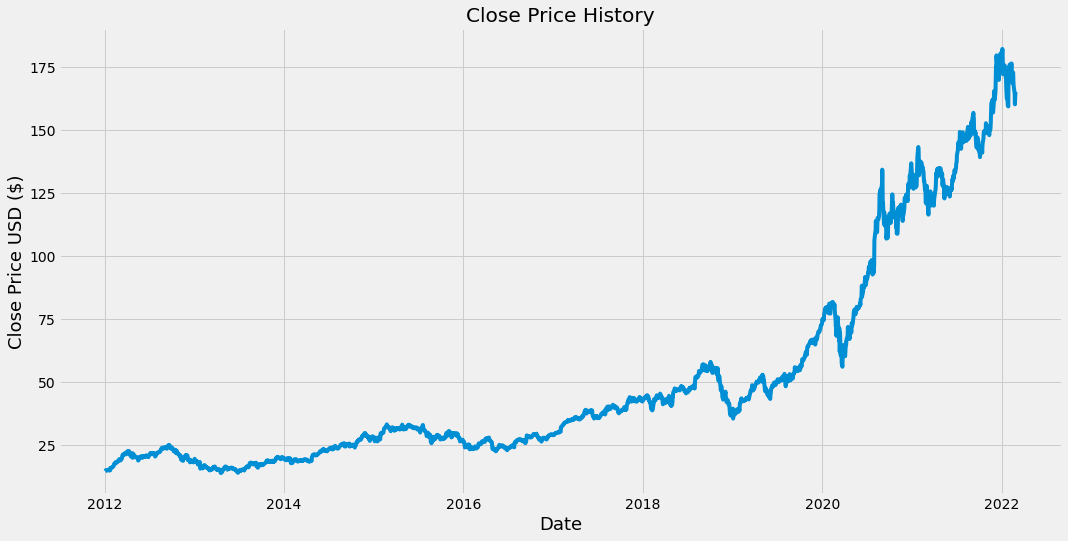

In [41]:
#visualize data for the closing
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [42]:
#Create a new dataframe with only the Close Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2045

In [43]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.88534034],
       [0.89789519],
       [0.89950167]])

In [44]:
#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
        
x_train,y_train = np.array(x_train),np.array(y_train)

In [45]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1985, 60, 1)

In [46]:
#Build the LSTM Model
model = Sequential()

model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.add(Dense(1))

In [47]:
#Compile the model

model.compile(optimizer='adam',loss='mean_squared_error')

In [48]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1985/1985 [==============================] - 72s 34ms/step - loss: 2.8792e-04


In [51]:
#Create testing data set
test_data = scaled_data[training_data_len-60,:]
test_data
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

#Convert x_test to numpy array
        
x_test = np.array(x_test)
x_test.shape

(0,)

In [50]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

IndexError: tuple index out of range

In [30]:
#Get the model prediction price value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [33]:
#Get the Root Main Squared Error(RMSE)
rmse= np.sqrt(np.mean(predictions- y_test)**2)
rmse


ValueError: operands could not be broadcast together with shapes (1985,1) (511,1) 